In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from konlpy.utils import partition
import re

# 데이터 가져오기

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147871 entries, 0 to 147870
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   comments  147871 non-null  object
 1   label     147871 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39649 entries, 0 to 39648
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  39649 non-null  object
 1   label     39649 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 619.6+ KB


In [4]:
train=train[:20000]
test=test[:4000]

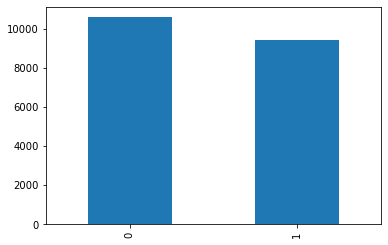

In [5]:
train['label'].value_counts().plot(kind='bar')

In [6]:
wordDict={"[^ㄱ-ㅎ가-힣 ]":" ",'[\d+]':' ','[ㅡ+]':'','[ㅠ+]':'','[ㅜ+]':'','[ㄱ-ㅎ]':'','[ㅏ-ㅣ]':'','ᆢᆢ':''}

In [7]:
for i,j in wordDict.items():
    train['comments']=train.comments.str.replace(i,j)
    test['comments']=test.comments.str.replace(i,j)

In [8]:
def cw(x):
    simdict={'추카':'축하'
            }
    for index,word in simdict.items():
        return re.sub(index,word,x)

In [9]:
train['comments']=train.comments.apply(cw)
test['comments']=test.comments.apply(cw)

# stopwords

In [10]:
stopwords=['아','휴','아이구','아이쿠','아이고','어','나','우리','저희','따라','의해','을','를','에','의','가','으로','로','에게','뿐이다','의거하여','근거하여','입각하여','기준으로',
'예하면','예를 들면','예를 들자면','저','소인','소생','저희','지말고','하지마','하지마라','다른','물론','또한','그리고','비길수 없다','해서는 안된다','뿐만 아니라','만이 아니다',
'만은 아니다','막론하고','관계없이','그치지 않다','그러나','그런데','하지만','든간에','논하지 않다','따지지 않다','설사','비록','더라도','아니면','만' '못하다','하는 편이 낫다',
'불문하고','향하여','향해서','향하다','쪽으로','틈타','이용하여','타다','오르다','제외하고','이 외에','이 밖에','하여야','비로소','한다면' '몰라도','외에도','이곳','여기','부터',
'기점으로,따라서','할 생각이다','하려고하다','이리하여','그리하여','그렇게' '함으로써','하지만','일때','할때','앞에서','중에서','보는데서','으로써','로써','까지','해야한다',
'일것이다','반드시','할줄알다','할수있다','할수있어','임에 틀림없다','한다면','등','등등','제','겨우','단지','다만','할뿐','딩동','댕그','대해서','대하여','대하면','훨씬','얼마나',
'얼마만큼','얼마큼','남짓','여','얼마간','약간','다소','좀','조금','다수','몇','얼마','지만','하물며','또한','그러나','그렇지만','하지만','이외에도','대해 말하자면','뿐이다','다음에',
'반대로','반대로 말하자면','이와 반대로','바꾸어서 말하면','바꾸어서 한다면','만약','그렇지않으면','까악','툭','딱','삐걱거리다','보드득','비걱거리다','꽈당','응당','해야한다',
'에 가서','각','각각','여러분','각종','각자','제각기','하도록하다','와','과','그러므로','그래서','고로','한 까닭에','하기 때문에','거니와','이지만','대하여','관하여','관한','과연',
'실로','아니나다를가','생각한대로','진짜로','한적이있다','하곤하였다','하','하하','허허','아하','거바','와','오','왜','어째서','무엇때문에','어찌','하겠는가','무슨','어디','어느곳',
'더군다나','하물며','더욱이는','어느때','언제','야','이봐','어이','여보시오','흐흐','흥','휴','헉헉','헐떡헐떡','영차','여차','어기여차','끙끙','아야','앗','아야','콸콸','졸졸','좍좍','뚝뚝',
'주룩주룩','솨','우르르','그래도','또','그리고','바꾸어말하면','바꾸어말하자면','혹은','혹시','답다','및','그에 따르는','때가 되어','즉','지든지','설령','가령','하더라도','할지라도',
'일지라도','지든지','몇','거의,하마터면','인젠','이젠','된바에야','된이상','만큼','어찌됏든','그위에','게다가','점에서 보아','비추어 보아','고려하면','하게될것이다','일것이다',
'비교적','좀','보다더','비하면','시키다','하게하다','할만하다','의해서','연이서','이어서','잇따라','뒤따라','뒤이어','결국','의지하여','기대여','통하여','자마자','더욱더','불구하고',
'얼마든지','마음대로','주저하지 않고','곧','즉시','바로','당장','하자마자','밖에' '안된다','하면된다','그래','그렇지','요컨대','다시 말하자면','바꿔 말하면','즉','구체적으로',
'말하자면','시작하여','시초에','이상','허','헉','허걱','바와같이','해도좋다','해도된다','게다가','더구나','하물며','와르르','팍','퍽','펄렁','동안','이래','하고있었다','이었다','에서',
'로부터','까지','예하면','했어요','해요','함께','같이','더불어','마저','마저도','양자','모두','습니다','가까스로','하려고하다','즈음하여','다른','다른 방면으로','해봐요','습니까',
'했어요','말할것도 없고','무릎쓰고','개의치않고','하는것만 못하다','하는것이 낫다','매','매번','들','모','어느것','어느','로써','갖고말하자면','어디','어느쪽','어느것','어느해',
'어느 년도','라' '해도','언젠가','어떤것','어느것','저기','저쪽','저것','그때','그럼','그러면','요만한걸','그래','그때','저것만큼','그저','이르기까지','할 줄 안다','할 힘이' '있다',
'너','너희','당신','어찌','설마','차라리','할지언정','할지라도','할망정','할지언정','구토하다','게우다','토하다','메쓰겁다','옆사람','퉤','쳇','의거하여','근거하여','의해','따라',
'힘입어','그','다음','버금','두번째로','기타','첫번째로','나머지는','그중에서','견지에서','형식으로 쓰여','입장에서','위해서','단지','의해되다','하도록시키다','뿐만아니라',
'반대로','전후','전자','앞의것','잠시','잠깐','하면서','그렇지만','다음에','그러한즉','그런즉','남들','아무거나','어찌하든지','같다','비슷하다','예컨대','이럴정도로','어떻게',
'만약','만일','위에서' '서술한바와같이','인 듯하다','하지 않는다면','만약에','무엇','무슨','어느','어떤','아래윗','조차','한데','그럼에도 불구하고','여전히','심지어','까지도',
'조차도','하지 않도록','않기 위하여','때','시각','무렵','시간','동안','어때','어떠한','하여금','네','예','우선','누구','누가' '알겠는가','아무도','줄은모른다','줄은 몰랏다','하는 김에',
'겸사겸사','하는바','그런 까닭에','한 이유는','그러니','그러니까','때문에','그','너희','그들','너희들','타인','것','것들','너','위하여','공동으로','동시에','하기 위하여','어찌하여',
'무엇때문에','붕붕','윙윙','나','우리','엉엉','휘익','윙윙','오호','아하','어쨋든','만 못하다','하기보다는','차라리,하는 편이 낫다','흐흐','놀라다','상대적으로 말하자면','마치',
'아니라면','쉿','그렇지 않으면','그렇지' '않다면','안 그러면','아니었다면','하든지','아니면','이라면','좋아','알았어','하는것도','그만이다','어쩔수 없다','하나','일','일반적으로',
'일단','한켠으로는','오자마자','이렇게되면','이와같다면','전부','한마디','한항목','근거로','하기에','아울러','하지 않도록','않기 위해서','이르기까지','이 되다','로 인하여',
'까닭으로','이유만으로','이로 인하여','그래서','이 때문에','그러므로','그런 까닭에','알 수 있다','결론을 낼 수 있다','으로 인하여','있다','어떤것','관계가 있다','관련이 있다',
'연관되다','어떤것들','에 대해','이리하여','그리하여','여부','하기보다는','하느니','하면 할수록','운운','이러이러하다','하구나','하도다','다시말하면','다음으로','에 있다',
'에 달려 있다','우리','우리들','오히려','하기는한데','어떻게','어떻해','어찌됏어','어때','어째서','본대로','자','이','이쪽','여기','이것','이번','이렇게말하자면','이런','이러한',
'이와 같은','요만큼','요만한 것','얼마 안 되는 것','이만큼','이 정도의','이렇게 많은 것','이와 같다','이때','이렇구나','것과 같이','끼익','삐걱,따위','와 같은 사람들',
'부류의 사람들','왜냐하면','중의하나','오직','오로지','에 한하다','하기만 하면','도착하다','까지 미치다','도달하다','정도에 이르다','할 지경이다','결과에 이르다','관해서는',
'여러분','하고 있다','한 후','혼자','자기','자기집','자신','우에' '종합한것과같이','총적으로' '보면','총적으로' '말하면','총적으로','대로 하다','으로서','참','그만이다','할 따름이다','쿵',
'탕탕','쾅쾅','둥둥','봐','봐라','아이야','아니','와아','응','아이','참나','년','월','일','령','영','일','이','삼','사','오','육','륙','칠','팔','구','이천육','이천칠','이천팔','이천구','하나','둘','셋',
'넷','다섯','여섯','일곱','여덟','아홉','령','영']

In [11]:
# konlpyList=['okt','']

In [12]:
n=1 #단어 길이

In [13]:
okt=Okt()
wordList=[]
word_index={}
wordCount={}
train['okt']='0'
for index ,sentencs in enumerate(train['comments']):
    words=okt.morphs(sentencs,norm=True,stem=True)   
    temp=[]
    for word in words:
        if word not in stopwords:
            if len(word) >= n:
                temp.append(word)
                if word not in wordList:
                    wordCount[word]=1
                    wordList.append(word)
                else:
                    wordCount[word]=wordCount[word]+1
    train['okt'].iloc[index]=temp

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
wordCount_df=pd.DataFrame([[i,j] for i,j in wordCount.items()],columns=['word', 'index'])
wordCount_df.to_csv('wordCount_df.csv')

In [15]:
m=1 #빈도수

In [16]:
wordList=[]
word_index={}
for index ,word in enumerate(wordCount.keys()):
    if wordCount[word]>= m : 
        word_index[word]=len(wordList)
        wordList.append(word)

In [17]:
test['okt']='0'
for index ,sentencs in enumerate(test['comments']):
    words=okt.morphs(sentencs,norm=True,stem=True)
    temp=[]
    for word in words:
        if word in wordList:
            temp.append(word)
    test['okt'].iloc[index]=temp

# Document Term Matrix , One Hot Encoding

In [18]:
train_dtm_array=[]
train_ohe_array=[]
for corpus in train['okt']:
    temp1=[0]*len(word_index)
    temp2=[0]*len(word_index)
    for word in corpus:
        if word in word_index.keys():
            temp1[word_index[word]]=+1
            temp2[word_index[word]]=1
    train_dtm_array.append(temp1)
    train_ohe_array.append(temp2)

In [36]:
train_dtm=pd.DataFrame(train_dtm_array,columns=word_index.keys())
# train_dtm.to_csv('train_dtm.csv')
train_ohe=pd.DataFrame(train_ohe_array,columns=word_index.keys())
# train_ohe.to_csv('train_ohe.csv')

In [21]:
test_dtm_array=[]
test_ohe_array=[]
for corpus in test['okt']:
    temp1=[0]*len(word_index)
    temp2=[0]*len(word_index)
    for word in corpus:
        if word in word_index.keys():
            temp1[word_index[word]]=+1
            temp2[word_index[word]]=1
    test_dtm_array.append(temp1)
    test_ohe_array.append(temp2)

In [37]:
test_dtm=pd.DataFrame(test_dtm_array,columns=word_index.keys())
# test_dtm.to_csv('test_dtm.csv')
test_ohe=pd.DataFrame(test_ohe_array,columns=word_index.keys())
# test_ohe.to_csv('test_ohe.csv')

# xTrain yTrain xTest

In [38]:
xTrain=np.array(train_ohe_array)
yTrain=train['label'].values
xTest=np.array(test_ohe_array)
yTest=test['label'].values

In [39]:
yTrain

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

# naive_bayes

In [40]:
from sklearn.naive_bayes import CategoricalNB

In [41]:
model=CategoricalNB()
model.fit(xTrain, yTrain)

CategoricalNB()

In [42]:
pred_NB=model.predict(xTest)

In [43]:
model.score(xTrain , yTrain)

0.9187

In [44]:
test['pred_NB']=pred_NB
(test['label']==test['pred_NB']).sum()/test.shape[0]

0.893

# if-idf

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
def tfidf(dtm):
    n=dtm.shape[0]
    c=(dtm!=0).sum(axis=0)
    m=np.log(n/(c+1))
    return m*dtm

In [47]:
train_ifidf=tfidf(xTrain)
test_ifidf=tfidf(xTest)

# NB-SVM

In [48]:
def pr(y_i, y):
    p = train_dtm[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [49]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression()
    x_nb = train_dtm.multiply(r)
    return m.fit(x_nb, y), r

In [50]:
m,r = get_mdl(train['label'])
preds=m.predict_proba(test_dtm.multiply(r))

In [51]:
pred_NB_SVM=[]
for i in preds:
    pred_NB_SVM.append(i.argmax())

test['pred_NB_SVM']=pred_NB_SVM
(test['label']==test['pred_NB_SVM']).sum()/test.shape[0]

0.919

# RNN

In [52]:
from keras.models import Sequential 
from keras.layers import Dense
from keras import optimizers
from keras.models import load_model

In [53]:
model=Sequential()
model.add(Dense(2048,input_shape=(xTrain.shape[1],) ,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [54]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [55]:
train['none']=train['label']==0
train['hate']=train['label']==1
yTrain=train[['none','hate']].values
yTrain

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

In [56]:
x_val = xTrain[:2000]
partial_x_train = xTrain[2000:]

y_val = yTrain[:2000]
partial_y_train = yTrain[2000:]

In [57]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=300,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/300
36/36 [==============================] - 5s 142ms/step - loss: 0.6926 - accuracy: 0.5289 - val_loss: 0.6925 - val_accuracy: 0.5270
Epoch 2/300
36/36 [==============================] - 5s 137ms/step - loss: 0.6921 - accuracy: 0.5290 - val_loss: 0.6919 - val_accuracy: 0.5270
Epoch 3/300
36/36 [==============================] - 5s 137ms/step - loss: 0.6912 - accuracy: 0.5290 - val_loss: 0.6910 - val_accuracy: 0.5270
Epoch 4/300
36/36 [==============================] - 5s 140ms/step - loss: 0.6902 - accuracy: 0.5290 - val_loss: 0.6900 - val_accuracy: 0.5270
Epoch 5/300
36/36 [==============================] - 5s 138ms/step - loss: 0.6892 - accuracy: 0.5290 - val_loss: 0.6892 - val_accuracy: 0.5270
Epoch 6/300
36/36 [==============================] - 5s 137ms/step - loss: 0.6883 - accuracy: 0.5290 - val_loss: 0.6883 - val_accuracy: 0.5270
Epoch 7/300
36/36 [==============================] - 5s 138ms/step - loss: 0.6873 - accuracy: 0.5290 - val_loss: 0.6873 - val_accuracy: 0.5270

Epoch 58/300
36/36 [==============================] - 5s 145ms/step - loss: 0.2767 - accuracy: 0.8954 - val_loss: 0.3038 - val_accuracy: 0.8730
Epoch 59/300
36/36 [==============================] - 5s 144ms/step - loss: 0.2707 - accuracy: 0.8960 - val_loss: 0.2982 - val_accuracy: 0.8755
Epoch 60/300
36/36 [==============================] - 5s 143ms/step - loss: 0.2650 - accuracy: 0.8989 - val_loss: 0.2938 - val_accuracy: 0.8780
Epoch 61/300
36/36 [==============================] - 5s 145ms/step - loss: 0.2594 - accuracy: 0.9024 - val_loss: 0.2904 - val_accuracy: 0.8770
Epoch 62/300
36/36 [==============================] - 5s 143ms/step - loss: 0.2544 - accuracy: 0.9021 - val_loss: 0.2859 - val_accuracy: 0.8815
Epoch 63/300
36/36 [==============================] - 5s 144ms/step - loss: 0.2494 - accuracy: 0.9049 - val_loss: 0.2834 - val_accuracy: 0.8855
Epoch 64/300
36/36 [==============================] - 5s 147ms/step - loss: 0.2449 - accuracy: 0.9077 - val_loss: 0.2796 - val_accuracy:

Epoch 115/300
36/36 [==============================] - 5s 142ms/step - loss: 0.1142 - accuracy: 0.9620 - val_loss: 0.2284 - val_accuracy: 0.9075
Epoch 116/300
36/36 [==============================] - 5s 142ms/step - loss: 0.1126 - accuracy: 0.9626 - val_loss: 0.2250 - val_accuracy: 0.9095
Epoch 117/300
36/36 [==============================] - 5s 142ms/step - loss: 0.1109 - accuracy: 0.9640 - val_loss: 0.2271 - val_accuracy: 0.9085
Epoch 118/300
36/36 [==============================] - 5s 142ms/step - loss: 0.1092 - accuracy: 0.9648 - val_loss: 0.2264 - val_accuracy: 0.9080
Epoch 119/300
36/36 [==============================] - 5s 142ms/step - loss: 0.1076 - accuracy: 0.9649 - val_loss: 0.2253 - val_accuracy: 0.9105
Epoch 120/300
36/36 [==============================] - 5s 142ms/step - loss: 0.1059 - accuracy: 0.9661 - val_loss: 0.2257 - val_accuracy: 0.9070
Epoch 121/300
36/36 [==============================] - 5s 142ms/step - loss: 0.1046 - accuracy: 0.9667 - val_loss: 0.2339 - val_ac

36/36 [==============================] - 5s 149ms/step - loss: 0.0506 - accuracy: 0.9863 - val_loss: 0.2573 - val_accuracy: 0.9095
Epoch 172/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0501 - accuracy: 0.9862 - val_loss: 0.2554 - val_accuracy: 0.9075
Epoch 173/300
36/36 [==============================] - 5s 146ms/step - loss: 0.0494 - accuracy: 0.9864 - val_loss: 0.2579 - val_accuracy: 0.9025
Epoch 174/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0488 - accuracy: 0.9864 - val_loss: 0.2618 - val_accuracy: 0.9090
Epoch 175/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0482 - accuracy: 0.9867 - val_loss: 0.2573 - val_accuracy: 0.9050
Epoch 176/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0477 - accuracy: 0.9866 - val_loss: 0.2587 - val_accuracy: 0.9025
Epoch 177/300
36/36 [==============================] - 5s 148ms/step - loss: 0.0469 - accuracy: 0.9869 - val_loss: 0.2592 - val_accuracy: 0.9015

36/36 [==============================] - 5s 146ms/step - loss: 0.0279 - accuracy: 0.9903 - val_loss: 0.2984 - val_accuracy: 0.9025
Epoch 228/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0277 - accuracy: 0.9901 - val_loss: 0.3012 - val_accuracy: 0.9060
Epoch 229/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0273 - accuracy: 0.9906 - val_loss: 0.2983 - val_accuracy: 0.9090
Epoch 230/300
36/36 [==============================] - 5s 146ms/step - loss: 0.0273 - accuracy: 0.9899 - val_loss: 0.3002 - val_accuracy: 0.9075
Epoch 231/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0268 - accuracy: 0.9908 - val_loss: 0.2988 - val_accuracy: 0.9070
Epoch 232/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0267 - accuracy: 0.9903 - val_loss: 0.3004 - val_accuracy: 0.9055
Epoch 233/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0267 - accuracy: 0.9904 - val_loss: 0.3032 - val_accuracy: 0.9070

36/36 [==============================] - 5s 148ms/step - loss: 0.0206 - accuracy: 0.9914 - val_loss: 0.3333 - val_accuracy: 0.9035
Epoch 284/300
36/36 [==============================] - 5s 147ms/step - loss: 0.0202 - accuracy: 0.9914 - val_loss: 0.3517 - val_accuracy: 0.9045
Epoch 285/300
36/36 [==============================] - 5s 148ms/step - loss: 0.0204 - accuracy: 0.9914 - val_loss: 0.3446 - val_accuracy: 0.9050
Epoch 286/300
36/36 [==============================] - 5s 148ms/step - loss: 0.0202 - accuracy: 0.9918 - val_loss: 0.3362 - val_accuracy: 0.9060
Epoch 287/300
36/36 [==============================] - 5s 148ms/step - loss: 0.0200 - accuracy: 0.9924 - val_loss: 0.3348 - val_accuracy: 0.9050
Epoch 288/300
36/36 [==============================] - 5s 148ms/step - loss: 0.0200 - accuracy: 0.9915 - val_loss: 0.3362 - val_accuracy: 0.9045
Epoch 289/300
36/36 [==============================] - 5s 148ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.3360 - val_accuracy: 0.9065

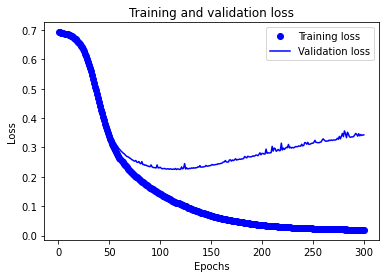

In [58]:
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo',label="Training loss" )
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

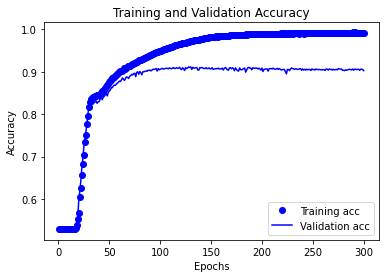

In [59]:
plt.clf() #그래프 초기화 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [78]:
model.save('RNN_model_small.h5')

In [79]:
pred_RNN=model.predict(xTest)

In [80]:
pred_RNN_list=[]
for i in range(len(pred_RNN)):
    pred_RNN_list.append(pred_RNN[i].argmax())

In [81]:
test['pred_RNN']=pred_RNN_list
(test['label']==test['pred_RNN']).sum()/test.shape[0]

0.90625